In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datasets import load_dataset
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

We created a dataset that, by grouping by cyclist has the averages of their performances identified in the features created in the feature engineering phase 

In [63]:
dataset = load_dataset('csv', data_files='../dataset/Cyclists_FE_Aggregated.csv')

df = dataset['train'].to_pandas()

df.head()

,cyclist,avg_climb_efficiency,avg_PWR,avg_time_gap,avg_prestige_weighted_delta,BMI,consistency_score,weight,height
0,aad-van-den-hoek,70.002672,1.172932,0.000091,0.115965,22.256908,0.000030,77.000000,186.000000
1,aaron-gate,104.033478,1.608360,0.000010,0.019194,21.672110,0.000086,71.000000,181.000000
2,aaron-kemps,75.050568,0.966539,0.000029,0.066256,22.282592,0.000265,73.000000,181.000000
3,aaron-olsen,144.165604,1.695782,0.000037,0.086395,18.821635,0.000000,55.431638,171.613001
4,aaron-van-poucke,78.833699,6.617647,0.000102,0.110034,21.705129,0.000000,68.000000,177.000000


In [64]:
duplicates = df[df['cyclist'].duplicated()]

duplicates

,cyclist,avg_climb_efficiency,avg_PWR,avg_time_gap,avg_prestige_weighted_delta,BMI,consistency_score,weight,height


In [65]:
numerical_features_new = df.select_dtypes(include=['float64', 'int64'])
variances_new = numerical_features_new.var()

variances_new.sort_values(ascending=False)

avg_climb_efficiency           9.637940e+02
height                         4.129431e+01
weight                         4.096891e+01
avg_PWR                        2.587808e+00
BMI                            1.865572e+00
avg_prestige_weighted_delta    6.609345e-02
consistency_score              6.755044e-04
avg_time_gap                   1.660964e-07
dtype: float64

In [66]:
# Calcolo della matrice di correlazione per le feature numeriche
correlation_matrix = numerical_features_new.corr()

# Mostriamo la matrice di correlazione
correlation_matrix


,avg_climb_efficiency,avg_PWR,avg_time_gap,avg_prestige_weighted_delta,BMI,consistency_score,weight,height
avg_climb_efficiency,1.000000,-0.313283,0.008458,0.120256,0.017119,-0.208042,0.050368,0.049779
avg_PWR,-0.313283,1.000000,-0.001131,-0.081486,-0.033441,-0.007671,-0.058447,-0.046296
avg_time_gap,0.008458,-0.001131,1.000000,0.505352,0.002055,-0.015514,0.009642,0.010864
avg_prestige_weighted_delta,0.120256,-0.081486,0.505352,1.000000,-0.009114,-0.043470,0.007873,0.017509
BMI,0.017119,-0.033441,0.002055,-0.009114,1.000000,0.001486,0.644174,-0.053786
consistency_score,-0.208042,-0.007671,-0.015514,-0.043470,0.001486,1.000000,-0.003477,-0.005678
weight,0.050368,-0.058447,0.009642,0.007873,0.644174,-0.003477,1.000000,0.727381
height,0.049779,-0.046296,0.010864,0.017509,-0.053786,-0.005678,0.727381,1.000000


In [67]:
columns = ['height', 'weight', 'avg_prestige_weighted_delta']
df_reduced = df.drop(columns=columns)

In [ ]:
correlation_matrix = df_reduced.select_dtypes(include=['float64', 'int64']).corr()

correlation_matrix


,avg_climb_efficiency,avg_PWR,avg_time_gap,BMI,consistency_score
avg_climb_efficiency,1.000000,-0.313283,0.008458,0.017119,-0.208042
avg_PWR,-0.313283,1.000000,-0.001131,-0.033441,-0.007671
avg_time_gap,0.008458,-0.001131,1.000000,0.002055,-0.015514
BMI,0.017119,-0.033441,0.002055,1.000000,0.001486
consistency_score,-0.208042,-0.007671,-0.015514,0.001486,1.000000


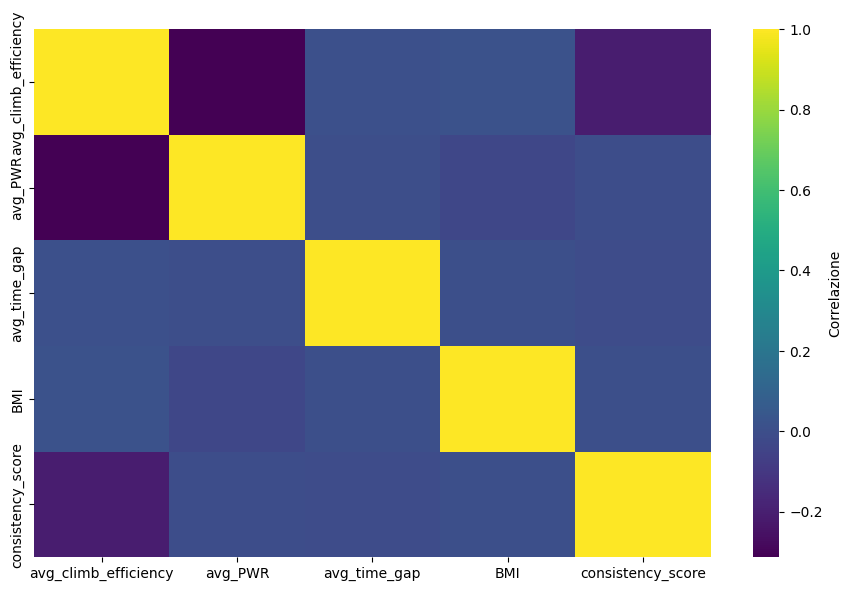

In [69]:
import seaborn as sns
g = sns.FacetGrid(correlation_matrix, height=6, aspect=1.5)
g.map_dataframe(
    lambda data, color: sns.heatmap(
        data[data.columns[:]], 
        cmap="viridis",  
        cbar_kws={'label': 'Correlazione'} 
    )
)

plt.show()

In [75]:
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df_reduced.select_dtypes(include=['float64', 'int64']))

pca = PCA(n_components=3)
pca_result = pca.fit_transform(numerical_features_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_cumulative = explained_variance_ratio.cumsum()

pca_summary = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': explained_variance_cumulative
})

pca_summary

,Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.275122,0.275122
1,PC2,0.205158,0.480281
2,PC3,0.199980,0.680260


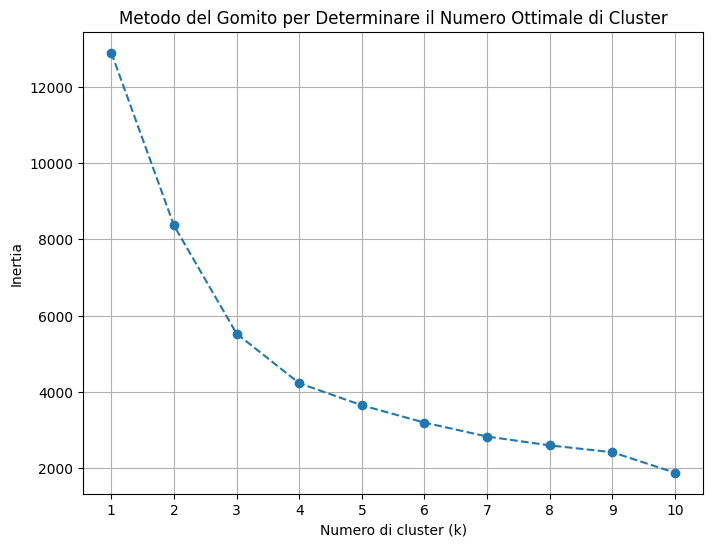

In [76]:
pca_components = pca_result[:, :2]

inertia_values = []
k_range = range(1, 11) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, init='random')
    kmeans.fit(pca_components)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia')
plt.title('Metodo del Gomito per Determinare il Numero Ottimale di Cluster')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [72]:
kmeans = KMeans(n_clusters=3, random_state=42, init='random')
kmeans_labels = kmeans.fit_predict(pca_components)

df_clustered = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_clustered['Cluster'] = kmeans_labels


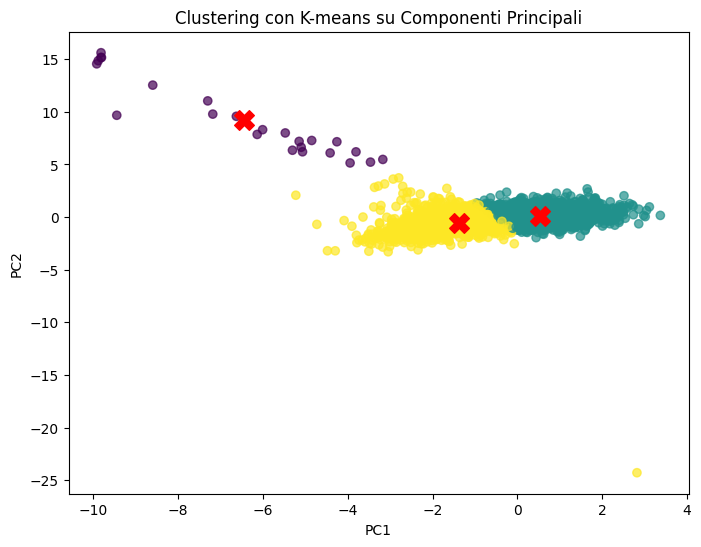

In [73]:
df_clustered = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_clustered['Cluster'] = kmeans_labels

# Visualizzazione del clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_clustered['PC1'], df_clustered['PC2'], c=df_clustered['Cluster'], cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centroidi
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering con K-means su Componenti Principali')
plt.show()

### Cluster validity

In [74]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(pca_components, kmeans_labels)
print(f"Silhouette Score medio: {silhouette_avg:.2f}")

Silhouette Score medio: 0.48
